In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import cv2
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../Fruit_Vegetable_Recognition-master/Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

../Fruit_Vegetable_Recognition-master/Dataset\test\apple\Image_1.jpg
../Fruit_Vegetable_Recognition-master/Dataset\test\apple\Image_10.jpg
../Fruit_Vegetable_Recognition-master/Dataset\test\apple\Image_2.jpg
../Fruit_Vegetable_Recognition-master/Dataset\test\apple\Image_3.jpg
../Fruit_Vegetable_Recognition-master/Dataset\test\apple\Image_4.jpg
../Fruit_Vegetable_Recognition-master/Dataset\test\apple\Image_5.jpg
../Fruit_Vegetable_Recognition-master/Dataset\test\apple\Image_6.JPG
../Fruit_Vegetable_Recognition-master/Dataset\test\apple\Image_7.jpg
../Fruit_Vegetable_Recognition-master/Dataset\test\apple\Image_8.jpg
../Fruit_Vegetable_Recognition-master/Dataset\test\apple\Image_9.jpg
../Fruit_Vegetable_Recognition-master/Dataset\test\banana\Image_1.jpg
../Fruit_Vegetable_Recognition-master/Dataset\test\banana\Image_10.jpg
../Fruit_Vegetable_Recognition-master/Dataset\test\banana\Image_2.jpg
../Fruit_Vegetable_Recognition-master/Dataset\test\banana\Image_3.jpg
../Fruit_Vegetable_Recogniti

In [23]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
from PIL import Image
print(tf.__version__)

2.8.4


In [27]:
# Create a list with the filepaths for training and testing
train_dir = Path('../Fruit_Vegetable_Recognition-master/Dataset/train')
train_filepaths = list(train_dir.glob(r'**/*.jpg'))
print(train_filepaths)
print(len(train_filepaths))

[WindowsPath('../Fruit_Vegetable_Recognition-master/Dataset/train/apple/Image_1.jpg'), WindowsPath('../Fruit_Vegetable_Recognition-master/Dataset/train/apple/Image_10.jpg'), WindowsPath('../Fruit_Vegetable_Recognition-master/Dataset/train/apple/Image_16.jpg'), WindowsPath('../Fruit_Vegetable_Recognition-master/Dataset/train/apple/Image_17.jpg'), WindowsPath('../Fruit_Vegetable_Recognition-master/Dataset/train/apple/Image_18.jpg'), WindowsPath('../Fruit_Vegetable_Recognition-master/Dataset/train/apple/Image_19.jpg'), WindowsPath('../Fruit_Vegetable_Recognition-master/Dataset/train/apple/Image_2.jpg'), WindowsPath('../Fruit_Vegetable_Recognition-master/Dataset/train/apple/Image_20.jpg'), WindowsPath('../Fruit_Vegetable_Recognition-master/Dataset/train/apple/Image_21.jpg'), WindowsPath('../Fruit_Vegetable_Recognition-master/Dataset/train/apple/Image_23.jpg'), WindowsPath('../Fruit_Vegetable_Recognition-master/Dataset/train/apple/Image_24.jpg'), WindowsPath('../Fruit_Vegetable_Recognition-

In [28]:
test_dir = Path('../Fruit_Vegetable_Recognition-master/Dataset/test')
test_filepaths = list(test_dir.glob(r'**/*.jpg'))
print(test_filepaths)
print(len(test_filepaths))

[WindowsPath('../Fruit_Vegetable_Recognition-master/Dataset/test/apple/Image_1.jpg'), WindowsPath('../Fruit_Vegetable_Recognition-master/Dataset/test/apple/Image_10.jpg'), WindowsPath('../Fruit_Vegetable_Recognition-master/Dataset/test/apple/Image_2.jpg'), WindowsPath('../Fruit_Vegetable_Recognition-master/Dataset/test/apple/Image_3.jpg'), WindowsPath('../Fruit_Vegetable_Recognition-master/Dataset/test/apple/Image_4.jpg'), WindowsPath('../Fruit_Vegetable_Recognition-master/Dataset/test/apple/Image_5.jpg'), WindowsPath('../Fruit_Vegetable_Recognition-master/Dataset/test/apple/Image_6.JPG'), WindowsPath('../Fruit_Vegetable_Recognition-master/Dataset/test/apple/Image_7.jpg'), WindowsPath('../Fruit_Vegetable_Recognition-master/Dataset/test/apple/Image_8.jpg'), WindowsPath('../Fruit_Vegetable_Recognition-master/Dataset/test/apple/Image_9.jpg'), WindowsPath('../Fruit_Vegetable_Recognition-master/Dataset/test/banana/Image_1.jpg'), WindowsPath('../Fruit_Vegetable_Recognition-master/Dataset/tes

In [29]:
val_dir = Path('../Fruit_Vegetable_Recognition-master/Dataset/validation')
val_filepaths = list(val_dir.glob(r'**/*.jpg'))
print(val_filepaths)

[WindowsPath('../Fruit_Vegetable_Recognition-master/Dataset/validation/apple/Image_1.jpg'), WindowsPath('../Fruit_Vegetable_Recognition-master/Dataset/validation/apple/Image_10.jpg'), WindowsPath('../Fruit_Vegetable_Recognition-master/Dataset/validation/apple/Image_2.jpg'), WindowsPath('../Fruit_Vegetable_Recognition-master/Dataset/validation/apple/Image_3.jpg'), WindowsPath('../Fruit_Vegetable_Recognition-master/Dataset/validation/apple/Image_4.jpg'), WindowsPath('../Fruit_Vegetable_Recognition-master/Dataset/validation/apple/Image_5.jpg'), WindowsPath('../Fruit_Vegetable_Recognition-master/Dataset/validation/apple/Image_6.JPG'), WindowsPath('../Fruit_Vegetable_Recognition-master/Dataset/validation/apple/Image_7.jpg'), WindowsPath('../Fruit_Vegetable_Recognition-master/Dataset/validation/apple/Image_8.jpg'), WindowsPath('../Fruit_Vegetable_Recognition-master/Dataset/validation/apple/Image_9.jpg'), WindowsPath('../Fruit_Vegetable_Recognition-master/Dataset/validation/banana/Image_1.jpg

In [30]:
def image_processing(filepath):

    labels = [str(filepath[i]).split("\\")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    df = pd.concat([filepath, labels], axis=1)

    # Shuffle the DataFrame and reset index
    df = df.sample(frac=1).reset_index(drop = True)
    
    return df

In [31]:
train_df = image_processing(train_filepaths)
test_df = image_processing(test_filepaths)
val_df = image_processing(val_filepaths)

In [32]:
print('-- Training set --\n')
print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')

-- Training set --

Number of pictures: 2855

Number of different labels: 36

Labels: ['apple' 'chillipepper' 'spinach' 'soy beans' 'peas' 'capsicum' 'corn'
 'tomato' 'garlic' 'pear' 'turnip' 'pomegranate' 'banana' 'grapes' 'onion'
 'potato' 'watermelon' 'cauliflower' 'pineapple' 'orange' 'eggplant'
 'cabbage' 'lettuce' 'bellpepper' 'sweetpotato' 'mango' 'kiwi' 'raddish'
 'carrot' 'paprika' 'jalepeno' 'beetroot' 'cucumber' 'ginger' 'lemon'
 'sweetcorn']


In [33]:
train_df.head(5)

,Filepath,Label
0,..\Fruit_Vegetable_Recognition-master\Dataset\...,apple
1,..\Fruit_Vegetable_Recognition-master\Dataset\...,chillipepper
2,..\Fruit_Vegetable_Recognition-master\Dataset\...,spinach
3,..\Fruit_Vegetable_Recognition-master\Dataset\...,soy beans
4,..\Fruit_Vegetable_Recognition-master\Dataset\...,peas


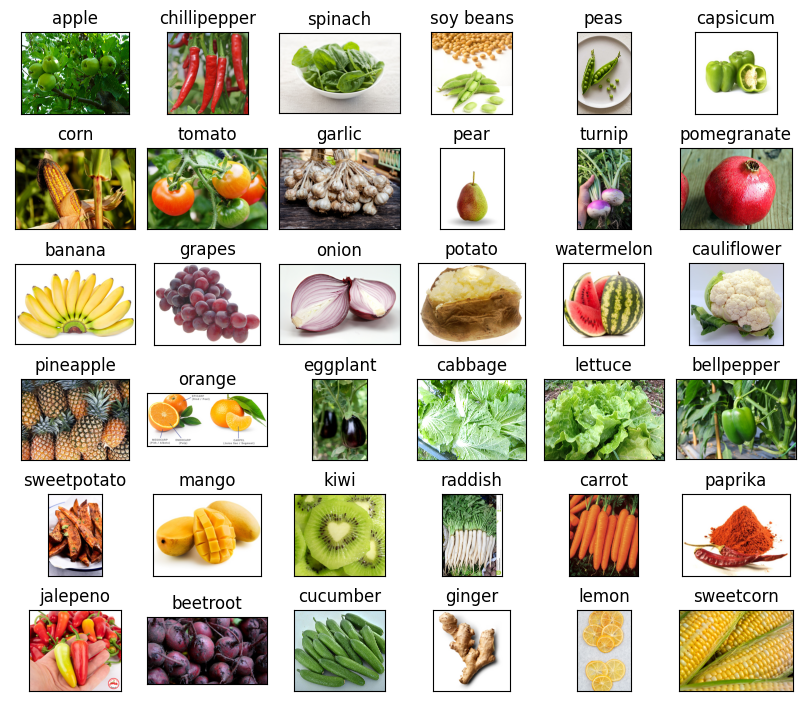

In [34]:
# Create a DataFrame with one Label of each category
df_unique = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()

# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(8, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.set_title(df_unique.Label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

In [35]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [36]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 2855 validated image filenames belonging to 36 classes.


In [40]:
val_images = train_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 340 validated image filenames belonging to 36 classes.


In [41]:
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 340 validated image filenames belonging to 36 classes.


In [42]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

In [43]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(36, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    batch_size = 32,
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)

Epoch 1/5
90/90 [==============================] - 231s 2s/step - loss: 1.8576 - accuracy: 0.5205 - val_loss: 0.4900 - val_accuracy: 0.8529
Epoch 2/5
90/90 [==============================] - 207s 2s/step - loss: 0.5920 - accuracy: 0.8137 - val_loss: 0.2913 - val_accuracy: 0.9147
Epoch 3/5
90/90 [==============================] - 207s 2s/step - loss: 0.3418 - accuracy: 0.8890 - val_loss: 0.1976 - val_accuracy: 0.9412
Epoch 4/5
90/90 [==============================] - 206s 2s/step - loss: 0.2298 - accuracy: 0.9264 - val_loss: 0.2044 - val_accuracy: 0.9441
Epoch 5/5
90/90 [==============================] - 206s 2s/step - loss: 0.1556 - accuracy: 0.9503 - val_loss: 0.1684 - val_accuracy: 0.9676


In [44]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)
# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred1 = [labels[k] for k in pred]
pred1

['tomato',
 'lettuce',
 'paprika',
 'capsicum',
 'spinach',
 'banana',
 'peas',
 'garlic',
 'capsicum',
 'pear',
 'kiwi',
 'bellpepper',
 'chillipepper',
 'potato',
 'mango',
 'sweetpotato',
 'ginger',
 'onion',
 'ginger',
 'pear',
 'orange',
 'jalepeno',
 'sweetcorn',
 'cucumber',
 'cabbage',
 'pear',
 'pear',
 'pomegranate',
 'bellpepper',
 'sweetpotato',
 'sweetcorn',
 'garlic',
 'peas',
 'cucumber',
 'eggplant',
 'cabbage',
 'cabbage',
 'capsicum',
 'tomato',
 'potato',
 'capsicum',
 'beetroot',
 'onion',
 'pomegranate',
 'tomato',
 'watermelon',
 'jalepeno',
 'kiwi',
 'cauliflower',
 'pineapple',
 'sweetcorn',
 'mango',
 'kiwi',
 'cucumber',
 'onion',
 'potato',
 'potato',
 'ginger',
 'paprika',
 'banana',
 'garlic',
 'mango',
 'spinach',
 'paprika',
 'soy beans',
 'sweetcorn',
 'peas',
 'peas',
 'kiwi',
 'eggplant',
 'apple',
 'eggplant',
 'pineapple',
 'orange',
 'cabbage',
 'bellpepper',
 'eggplant',
 'soy beans',
 'turnip',
 'cauliflower',
 'orange',
 'mango',
 'onion',
 'pine

In [47]:
def scanobj():
    cam = cv2.VideoCapture(0)
    cv2.namedWindow('python webcam screenshot app')
    img_counter = 0
    while True:
        ret, frame = cam.read()
        if not ret:
            print('failed to grab frame')
            break
        cv2.imshow('test', frame)
        k  = cv2.waitKey(1)
        if k%256 == 27:
            print('escape hit, closing the app')
            break
        elif k%256  == 32:
            img_name = f'opencv_frame_{img_counter}.png'
            cv2.imwrite(img_name, frame)
            print('screenshot taken')
            img_counter += 1
            break
            
    cam.release()
    cv2.destroyAllWindows()
    return img_name



In [48]:
def output(location):
    img=Image.open(location)
    img=img.resize((224,224)).convert('RGB')
    img=np.array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = labels[y]
    return res

In [59]:

currentimg = scanobj()
str1="C:\\Users\\User\\Desktop\\Fruit_Vegetable_Recognition-master\\Fruit_Vegetable_Recognition-master\\opencv_frame_0.png"
print(str1)
result=output(str1)
print(result)

screenshot taken
C:\Users\User\Desktop\Fruit_Vegetable_Recognition-master\Fruit_Vegetable_Recognition-master\opencv_frame_0.png
pineapple


In [61]:
model.save('auto.h5')